# Dataset:
    
Telecom Churn Prediction Dataset
- Description: Contains customer information for a subscription-based service provider to predict customer churn (leaving the service).
- Columns: Includes customer details, services used, contract terms, and churn status.
- Purpose: Used for customer churn analysis, segmentation, and retention strategies.
- Applications: Churn prediction, customer satisfaction analysis, and targeted marketing.
- Analysis Tasks: EDA, data preprocessing, ML model building, evaluation, and model deployment.
- Relevance: A practical dataset for real-world data science and customer relationship management scenarios.

## Step 1: Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Step 2: Loading the dataset

In [2]:
telecom_cust = pd.read_csv('Telco_Customer_Churn.csv')

## Step 3: Data Preprocessing & EDA

In [3]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# Converting Total Charges to a numerical data type.

telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')

In [8]:
# Checking for null values
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Removing missing values 

telecom_cust.dropna(inplace = True)

In [10]:
#Remove customer IDs from the data set

df2 = telecom_cust.iloc[:,1:]

In [11]:
#Convertin the predictor variable in a binary numeric variable

df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [12]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


<Axes: >

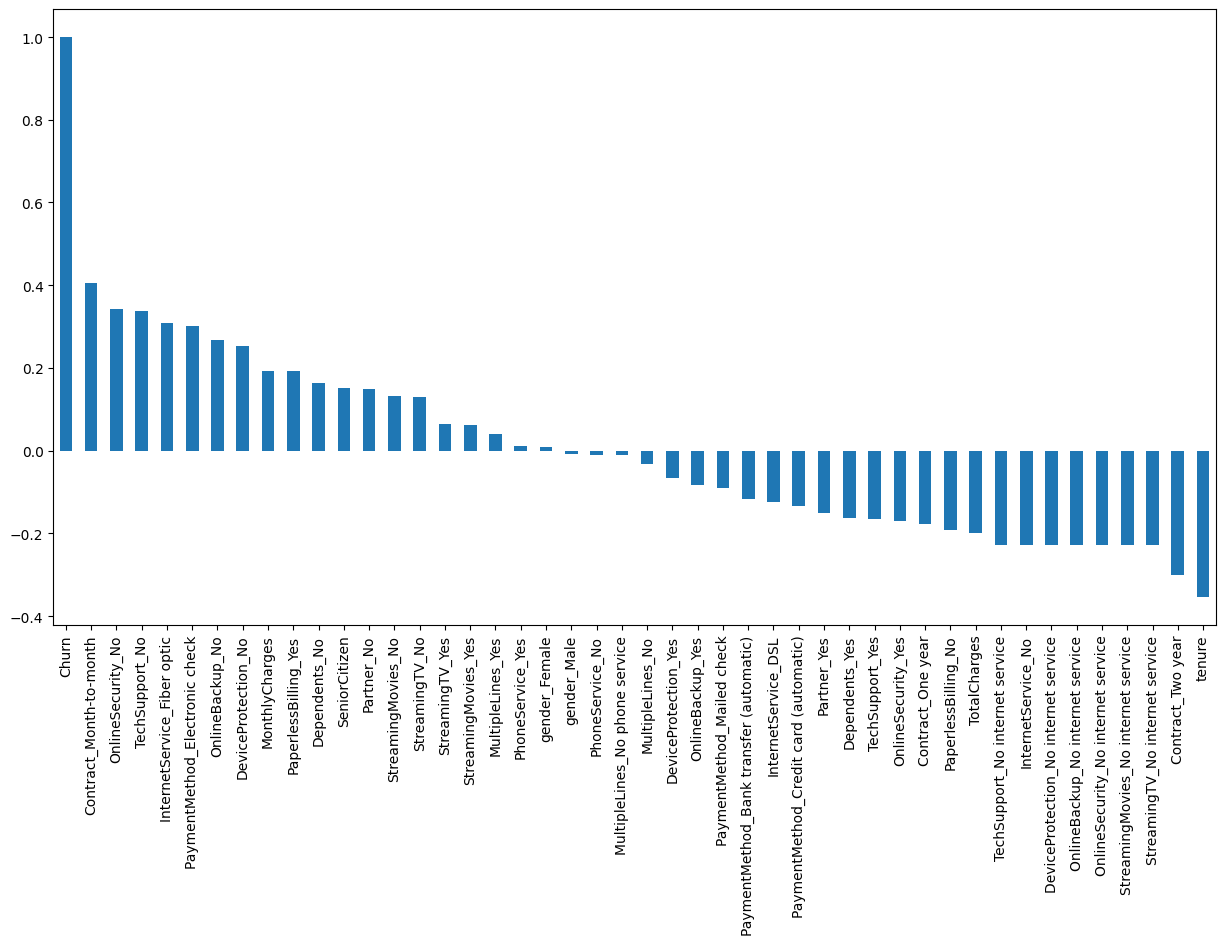

In [13]:
# Get Correlation of "Churn" with other variables

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### Intepretation

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. 
While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet 
connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying
the important variables.

## Data Exploration

- To understand patterns & potentially form some hypothesis

### A) Demographic

- Gender, Age Range, Partner and Dependent status

------------------------------------------------------

1) Gender Distribution

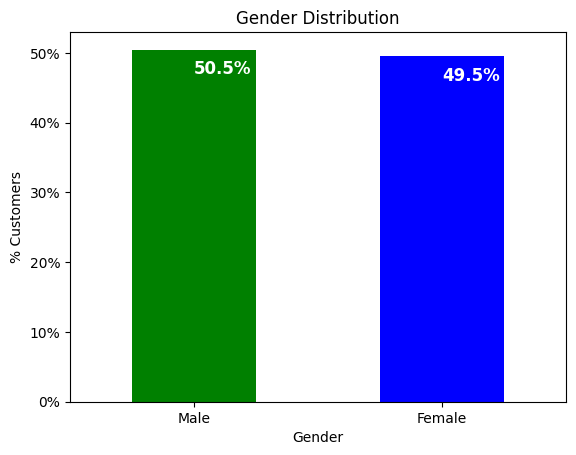

In [14]:
# Define colors for the bars in the chart
colors = ['green', 'blue']

# Count occurrences of each gender in the 'gender' column of the telecom_cust DataFrame
gender_counts = telecom_cust['gender'].value_counts()

# Create a bar chart of gender distribution as a percentage of total customers
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar',                # Specify that the plot type is a bar chart
    stacked=True,              # Option to stack bars (not necessary with one series)
    rot=0,                     # Set rotation of x-axis labels to 0 degrees (horizontal)
    color=colors               # Assign the defined colors to the bars
)

# Format the y-axis to display percentage values
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the label for the y-axis
ax.set_ylabel('% Customers')

# Set the label for the x-axis
ax.set_xlabel('Gender')

# Set the title of the bar chart
ax.set_title('Gender Distribution')

# Calculate the total number of customers for percentage calculation
total = gender_counts.sum()

# Iterate over each bar and its corresponding gender count
for bar, count in zip(ax.patches, gender_counts):
    # Calculate the percentage of each gender
    percentage = count / total * 100

    # Add a text label inside the bar showing the percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',     # Format percentage to one decimal place
            fontsize=12,              # Set font size of the label
            color='white',            # Set text color to white for visibility
            weight='bold'             # Set text weight to bold
           )

# Display the plot
plt.show()

# ----->
- Almost half are male & other half are female

#
2) Senior Citizen (%)

Text(0.5, 1.0, '% of Senior Citizens')

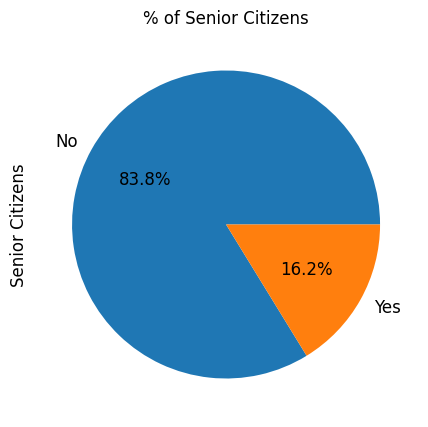

In [15]:
# Calculate the percentage of senior citizens in the 'SeniorCitizen' column
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)) \
    .plot.pie(                   # Create a pie chart
        autopct='%.1f%%',       # Format the percentage display to one decimal place
        labels=['No', 'Yes'],   # Set the labels for the pie chart slices
        figsize=(5, 5),         # Define the size of the pie chart (5x5 inches)
        fontsize=12             # Set the font size for the labels
    )

# Format the y-axis (though for a pie chart, this typically has no effect)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the label for the y-axis (not usually necessary for pie charts)
ax.set_ylabel('Senior Citizens', fontsize=12)

# Set the title of the pie chart
ax.set_title('% of Senior Citizens', fontsize=12)

# ------>

- Only 16% are senior citizen, that means most of the customer are younger people

# 
3) Partner and dependent status

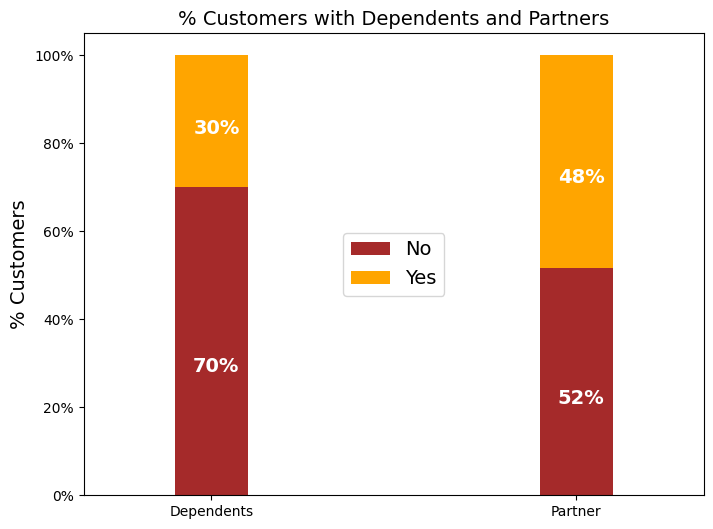

In [16]:
# Reshaping the DataFrame to have 'Dependents' and 'Partner' as variables
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents', 'Partner'])

# Grouping by the 'variable' and 'value' columns, then counting occurrences
df3 = df2.groupby(['variable', 'value']).count().unstack()

# Calculating the percentage of customers for each category
df3 = df3 * 100 / len(telecom_cust)

# Defining colors for the bar plot
colors = ['brown', 'orange']

# Creating a stacked bar plot for the percentages of customers with dependents and partners
ax = df3.loc[:, 'customerID'].plot.bar(stacked=True, color=colors,
                                        figsize=(8, 6), rot=0,
                                        width=0.2)

# Formatting the y-axis to display percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Setting the y-axis label
ax.set_ylabel('% Customers', size=14)

# Setting the x-axis label (left blank intentionally)
ax.set_xlabel('')

# Setting the title of the plot
ax.set_title('% Customers with Dependents and Partners', size=14)

# Adding a legend to the plot
ax.legend(loc='center', prop={'size': 14})

# Annotating each bar with the percentage value
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get width and height of the bar
    x, y = p.get_xy()  # Get x and y coordinates of the bar
    ax.annotate('{:.0f}%'.format(height), 
                (p.get_x() + .25 * width, p.get_y() + .4 * height),  # Positioning of the annotation
                color='white', weight='bold', size=14)  # Formatting the annotation

# ----->

About 50% of the customers have a partner, while only 30% of the total customers have dependents.

### B) Customer Account Information

- Tenure & contract

------------------------------------------

1) Tenure

Text(0.5, 1.0, 'No of Customers by their Tenure')

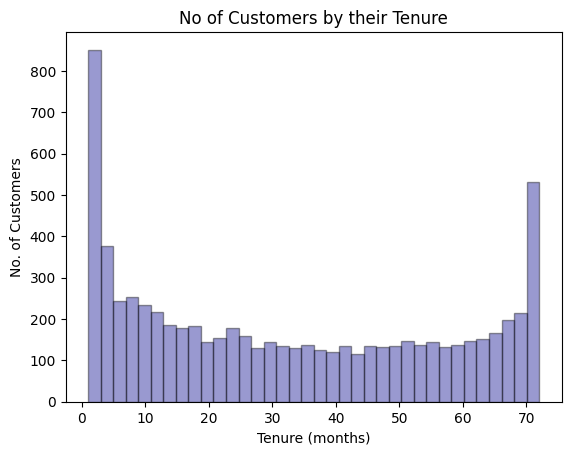

In [17]:
# Plotting a distribution plot for the 'tenure' variable
ax = sns.distplot(telecom_cust['tenure'], 
                  hist=True,  # Show the histogram
                  kde=False,  # Do not show the Kernel Density Estimate
                  bins=int(180/5),  # Number of bins (36 bins for tenure up to 180 months)
                  color='darkblue',  # Color of the histogram
                  hist_kws={'edgecolor': 'black'},  # Setting the edge color for the bars
                  kde_kws={'linewidth': 4})  # Line width for the KDE if it were displayed

# Labeling the y-axis to indicate the number of customers
ax.set_ylabel('No. of Customers')

# Labeling the x-axis to indicate the tenure in months
ax.set_xlabel('Tenure (months)')

# Setting the title of the plot for clarity
ax.set_title('No of Customers by their Tenure')

#
2) Contracts

Text(0.5, 1.0, 'No. of Customers by Contract Type')

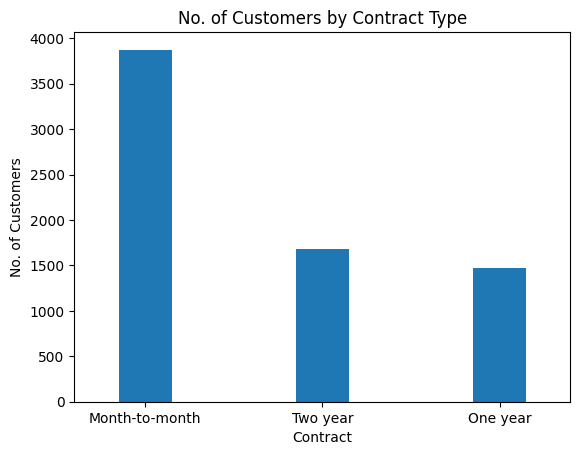

In [18]:
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

using plotly

In [ ]:
# pip install plotly

In [19]:
import plotly.express as px

# Assuming telecom_cust is a DataFrame with a 'Contract' column
contract_counts = telecom_cust['Contract'].value_counts().reset_index()
contract_counts.columns = ['Contract', 'No. of Customers']

fig = px.bar(contract_counts, x='Contract', y='No. of Customers',
             title='No. of Customers by Contract Type')
fig.update_layout(xaxis_title='Contract Type', yaxis_title='No. of Customers')
fig.show()


# ----->

Most of the customers are in the month to month contract while there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

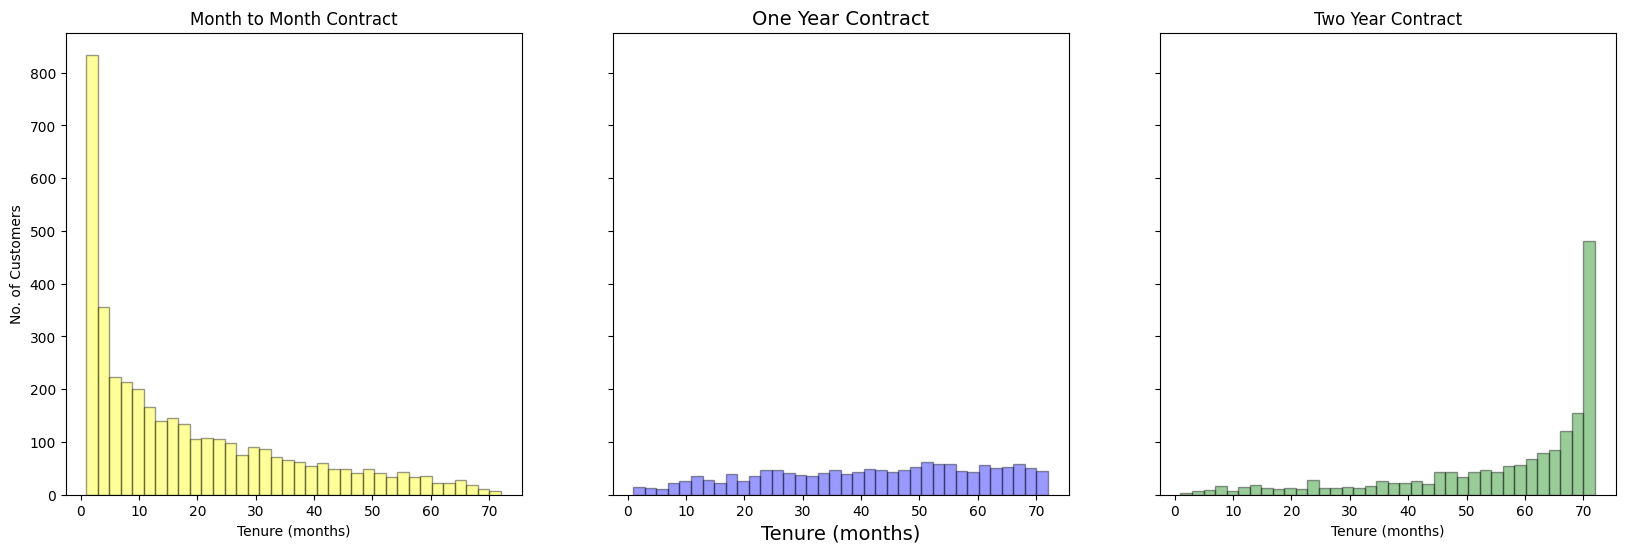

In [44]:
# Creating a figure with three subplots arranged in one row, sharing the y-axis
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plotting the distribution of tenure for 'Month-to-month' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                   hist=True,  # Show histogram
                   kde=False,  # Do not show KDE
                   bins=int(180 / 5),  # Number of bins (36 for tenure up to 180 months)
                   color='yellow',  # Color of the bars
                   hist_kws={'edgecolor': 'black'},  # Setting edge color for bars
                   kde_kws={'linewidth': 4},  # Line width for KDE (if displayed)
                   ax=ax1)  # Specify the subplot to plot on
ax.set_ylabel('No. of Customers')  # Label for the y-axis
ax.set_xlabel('Tenure (months)')  # Label for the x-axis
ax.set_title('Month to Month Contract')  # Title for the subplot

# Plotting the distribution of tenure for 'One year' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                   hist=True,
                   kde=False,
                   bins=int(180 / 5),
                   color='blue',
                   hist_kws={'edgecolor': 'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)  # Specify the subplot to plot on
ax.set_xlabel('Tenure (months)', size=14)  # Label for the x-axis with size
ax.set_title('One Year Contract', size=14)  # Title for the subplot with size

# Plotting the distribution of tenure for 'Two year' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                   hist=True,
                   kde=False,
                   bins=int(180 / 5),
                   color='green',
                   hist_kws={'edgecolor': 'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)  # Specify the subplot to plot on
ax.set_xlabel('Tenure (months)')  # Label for the x-axis
ax.set_title('Two Year Contract')  # Title for the subplot

# ----->

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time.

### C) Services Used by Customers



In [21]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

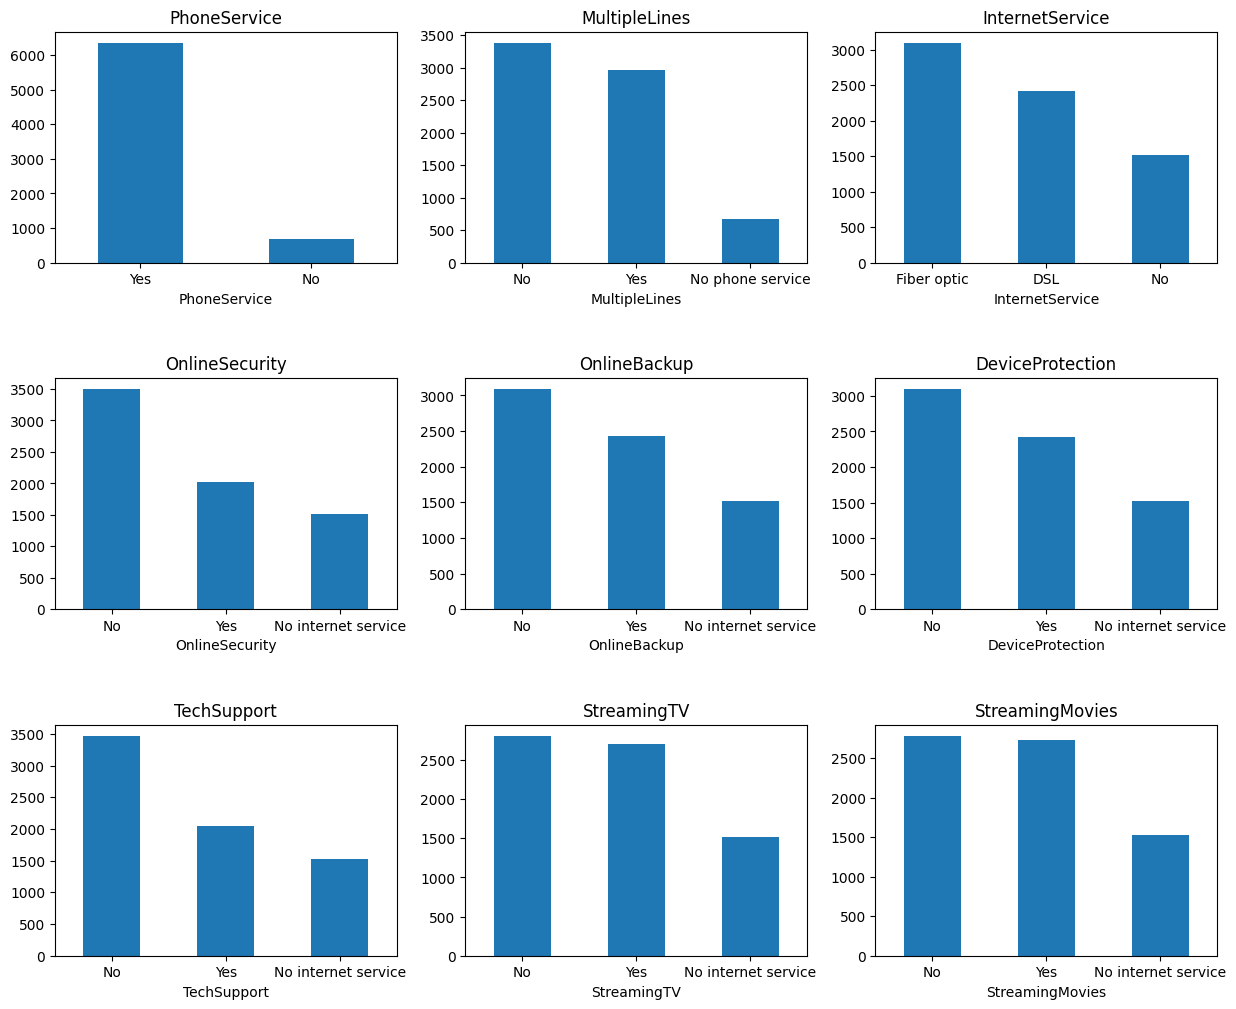

In [45]:
# List of service-related columns to plot
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Creating a 3x3 grid of subplots with a specified figure size
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Adjusting vertical spacing between the subplots
plt.subplots_adjust(hspace=0.5)

# Looping through the services to create bar plots
for i, item in enumerate(services):
    row, col = divmod(i, 3)  # Calculate the row and column index for the subplot grid

    # Plotting the value counts of the current service as a bar plot
    ax = telecom_cust[item].value_counts().plot(kind='bar', ax=axes[row, col], rot=0)
    ax.set_title(item)  # Setting the title for the current subplot

    # Rotating x-axis labels for better readability (though they're already set to 0)
    for tick in ax.get_xticklabels():
        tick.set_rotation(0)  # Explicitly setting rotation to 0 (optional)

# Displaying all plots
plt.show()

### D) Relation Between Monthly & Total Charges

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

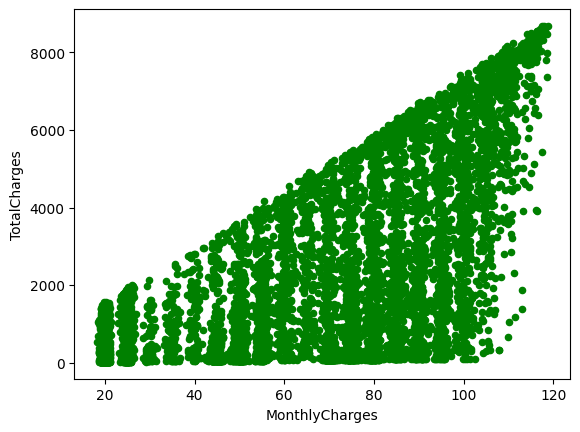

In [23]:
# Creating a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges', color = 'green')

# ----->

 Total charges increases as the monthly bill for a customer increases.

### E) Relationship between idependent variable (Churn) & other important variables

-------------------------------------------------------------------------------------------------

1) Churn rate with Customer

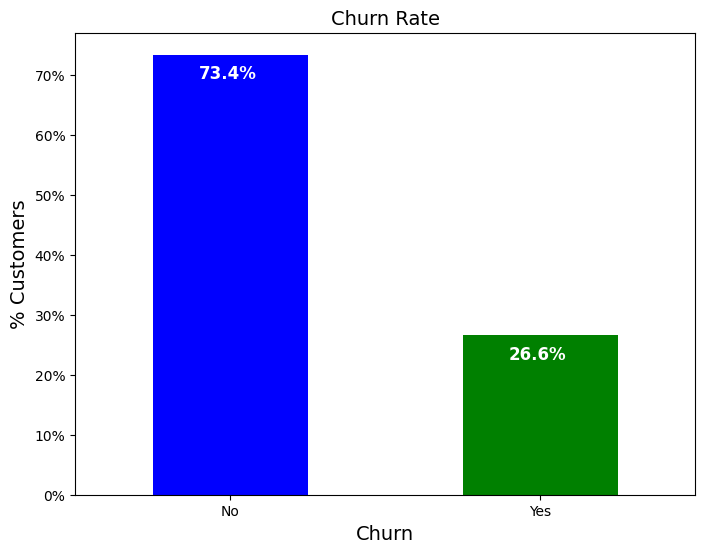

In [47]:
# Defining colors for the churn status bar plot
colors = ['blue', 'green']

# Calculating the percentage of customers who churned and plotting as a bar chart
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',  # Type of plot
    stacked=True,  # Stacking bars (though not needed for a single category)
    rot=0,  # No rotation for x-axis labels
    color=colors,  # Color for the bars
    figsize=(8, 6)  # Size of the figure
)

# Formatting the y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Labeling the y-axis
ax.set_ylabel('% Customers', size=14)

# Labeling the x-axis
ax.set_xlabel('Churn', size=14)

# Setting the title of the plot
ax.set_title('Churn Rate', size=14)

# Create a list to collect the widths of the bars (for labeling)
totals = []

# Finding the values of the bars and appending to the list
for i in ax.patches:
    totals.append(i.get_width())

# Calculating the total to help with percentage labeling
total = sum(totals)

# Adding percentage labels to each bar
for i in ax.patches:
    # The x-coordinate is adjusted to center the label; height is adjusted slightly for positioning
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',  # Calculate the percentage for each bar
            fontsize=12,  # Font size for the label
            color='white',  # Color of the text
            weight='bold')  # Bold text for emphasis

# 

2. Churn rate by ------> tenure, seniority, contract type, monthly charges and total charges
-
2.1. Churn vs Tenure

Text(0.5, 1.0, 'Tenure Distribution by Churn Status')

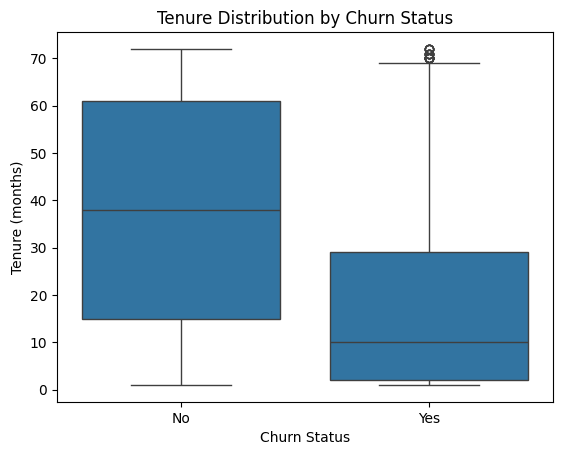

In [48]:
# Creating a box plot to visualize the distribution of tenure for different churn statuses
sns.boxplot(x=telecom_cust.Churn, y=telecom_cust.tenure)

# Setting labels and title for better context (optional)
plt.xlabel('Churn Status')  # Label for the x-axis
plt.ylabel('Tenure (months)')  # Label for the y-axis
plt.title('Tenure Distribution by Churn Status')  # Title for the plot

# ----->

The customers who do not churn, they tend to stay for a longer tenure with the telecom company.

# 
- 2.2 Churn by Contract Type

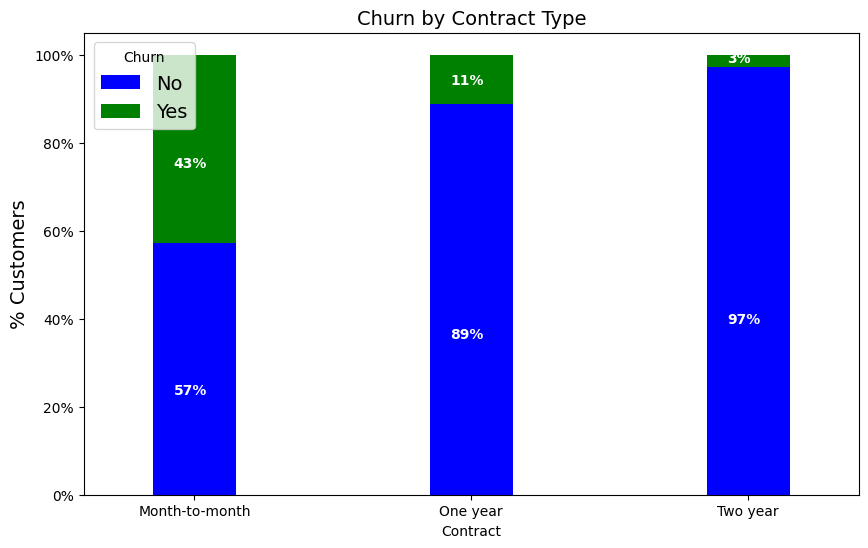

In [49]:
# Grouping the data by 'Contract' and 'Churn' to get the counts
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

# Plotting the churn rates by contract type as a stacked bar chart
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',  # Type of plot
    width=0.3,  # Width of the bars
    stacked=True,  # Stacking bars for each churn status
    rot=0,  # No rotation for x-axis labels
    figsize=(10, 6),  # Size of the figure
    color=colors  # Using predefined colors for the bars
)

# Formatting the y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding a legend to indicate churn status
ax.legend(loc='best', prop={'size': 14}, title='Churn')

# Labeling the y-axis to indicate customer percentages
ax.set_ylabel('% Customers', size=14)

# Setting the title of the plot for context
ax.set_title('Churn by Contract Type', size=14)

# Adding data labels on the stacked bar chart for clarity
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get the dimensions of each bar segment
    x, y = p.get_xy()  # Get the x and y coordinates of the bar segment
    ax.annotate('{:.0f}%'.format(height),  # Format the label as a percentage
                (p.get_x() + .25 * width, p.get_y() + .4 * height),  # Position the label
                color='white',  # Color of the text
                weight='bold',  # Bold text for emphasis
                size=10)  # Font size for the label

# -----> 
The customers who have a month to month contract have a very high churn rate.

# 
- 2.3 Churn by Seniority

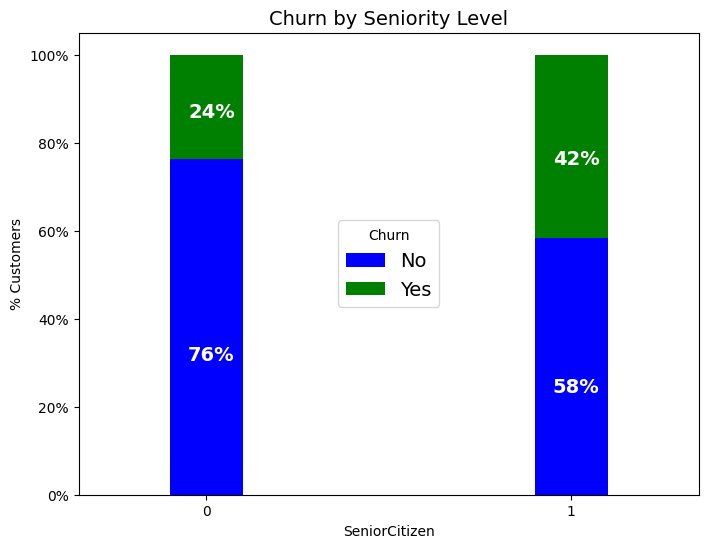

In [52]:
# Define colors for the bars in the chart
colors = ['blue', 'green']

# Group the telecom_cust DataFrame by 'SeniorCitizen' and 'Churn', then count occurrences
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Create a stacked bar chart showing the percentage of churn by seniority level
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',               # Specify that the plot type is a bar chart
    width=0.2,               # Set the width of the bars
    stacked=True,            # Specify that the bars should be stacked
    rot=0,                   # Set rotation of x-axis labels to 0 degrees (horizontal)
    figsize=(8, 6),         # Set the figure size to 8x6 inches
    color=colors             # Assign the defined colors to the bars
)

# Format the y-axis to display percentage values
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend to the chart, centered with specified font size and title
ax.legend(loc='center', prop={'size': 14}, title='Churn')

# Set the label for the y-axis
ax.set_ylabel('% Customers')

# Set the title of the bar chart
ax.set_title('Churn by Seniority Level', size=14)

# Code to add data labels on the stacked bar chart
for p in ax.patches:  # Iterate over each patch (bar) in the plot
    width, height = p.get_width(), p.get_height()  # Get the width and height of the bar
    x, y = p.get_xy()  # Get the (x, y) coordinates of the bar's bottom-left corner
    # Add a text annotation displaying the height (percentage) of the bar
    ax.annotate('{:.0f}%'.format(height),  # Format the height as a whole number
                (p.get_x() + .25 * width, p.get_y() + .4 * height),  # Position the text
                color='white',         # Set text color to white for visibility
                weight='bold',         # Set text weight to bold
                size=14)              # Set the font size of the annotation

# ------>

Senior Citizens have almost double the churn rate than younger population.

# 

- 2.4 Churn by Monthly Charges

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

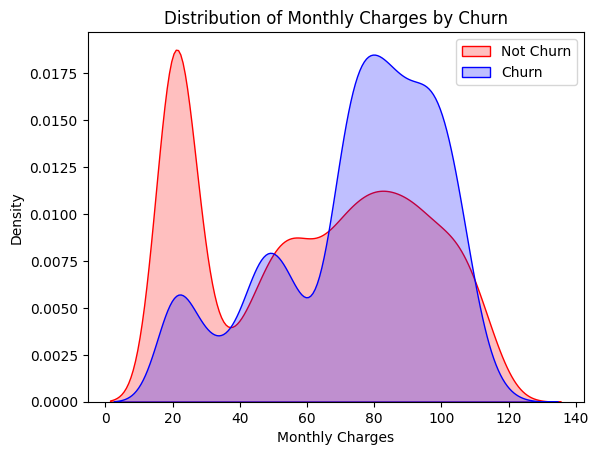

In [53]:
import seaborn as sns
# Plotting the Kernel Density Estimate (KDE) for Monthly Charges of customers who did not churn
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red", shade=True)  # 'shade=True' fills the area under the curve

# Overlaying the KDE for Monthly Charges of customers who churned
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax, color="Blue", shade=True)  # Using 'ax=ax' to add to the existing plot

# Adding a legend to distinguish between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Labeling the y-axis to indicate what the values represent
ax.set_ylabel('Density')

# Labeling the x-axis to indicate what is being measured
ax.set_xlabel('Monthly Charges')

# Setting the title of the plot for clarity
ax.set_title('Distribution of Monthly Charges by Churn')

# ----->

Higher % of customers churn when the monthly charges are high.

# 
- 2.5 Churn by Total Charges

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

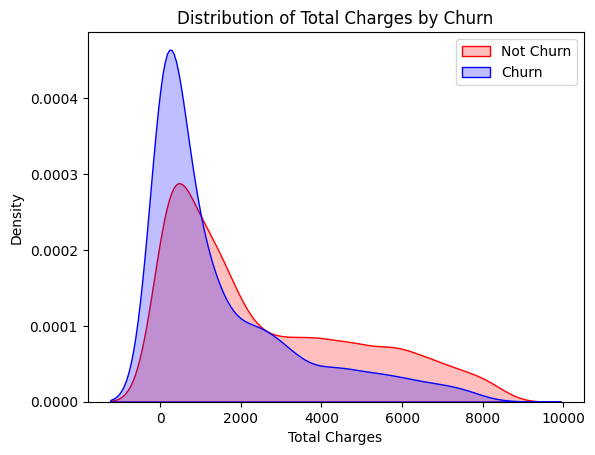

In [54]:
# Plotting the Kernel Density Estimate (KDE) for Total Charges of customers who did not churn
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red",  # Color for customers who did not churn
                 shade=True)  # Fill the area under the curve

# Overlaying the KDE for Total Charges of customers who churned
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax,  # Using the same axis for overlay
                 color="Blue",  # Color for customers who churned
                 shade=True)  # Fill the area under the curve

# Adding a legend to distinguish between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Labeling the y-axis to indicate the density of the values
ax.set_ylabel('Density')

# Labeling the x-axis to indicate what is being measured (total charges)
ax.set_xlabel('Total Charges')

# Setting the title of the plot for clarity
ax.set_title('Distribution of Total Charges by Churn')

# ----->

There is higer churn when the total charges are lower.

## Step 4: Predictive modeling - ML Algorithms

--------------------------------------------------------------------------------------------------------
Developing 
- Logistic Regression, 
- Random Forest, 
- SVM, 
- ADA Boost and 
- XG Boost

and compare them

### 1. Logistic Regresson

In [55]:
# Extracting the target variable (Churn) as an array
y = df_dummies['Churn'].values

# Dropping the target variable from the feature set
X = df_dummies.drop(columns=['Churn'])

# Importing MinMaxScaler from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Storing the feature names for later use
features = X.columns.values

# Initializing the MinMaxScaler to scale features to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fitting the scaler to the feature set
scaler.fit(X)

# Transforming the features using the fitted scaler and converting to a DataFrame
X = pd.DataFrame(scaler.transform(X))

# Renaming the columns to maintain the original feature names
X.columns = features

In [31]:
# Create Train & Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
# Running logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [33]:
from sklearn import metrics
prediction_test = model.predict(X_test)

# Print the prediction accuracy

print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


Axes(0.125,0.11;0.775x0.77)


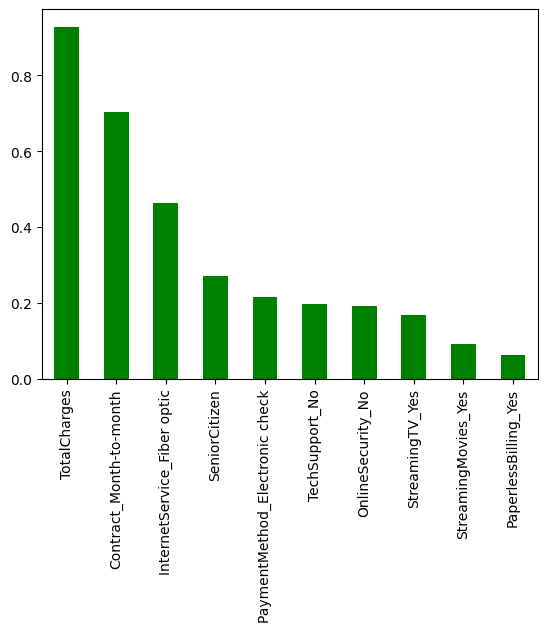

In [34]:
# To get the weights of all the variables

weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar', color = 'green'))

Axes(0.125,0.11;0.775x0.77)


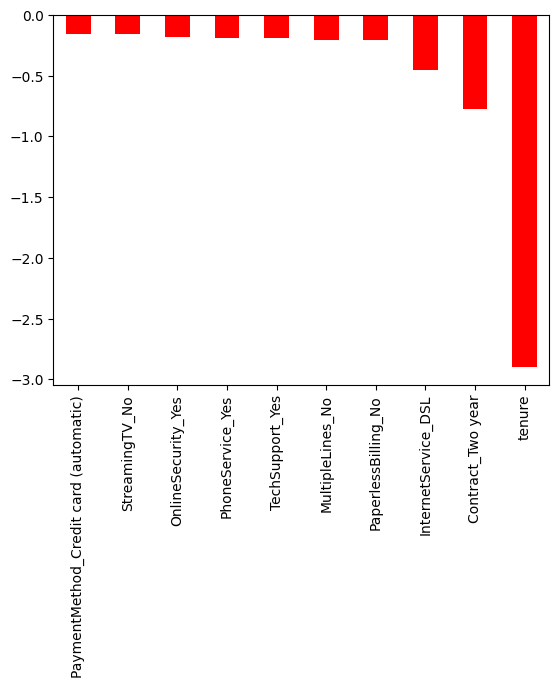

In [35]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar', color = 'red'))


#### Observations - LR

Some variable has positive & some negative relation with Predictive Variable (Churn)

- In EDA, having two month contracts reduces chance of Churn. That means it has negative relation with Churn.
- DSL internet also reduces the the probability of churn.
- total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates.

### 2. Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)
model_rf.fit(X_train, y_train)

# Make predictions

prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


<Axes: >

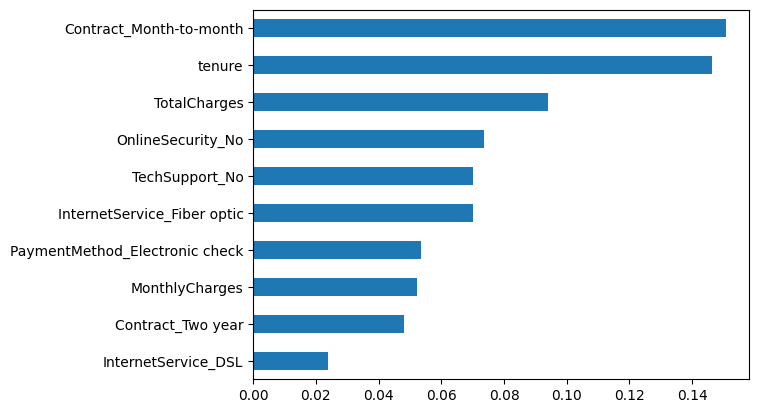

In [37]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### Observations - Random Forest

- Monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

### 3. Support Vecor Machine (SVM)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [39]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [40]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))

[[953  89]
 [164 201]]


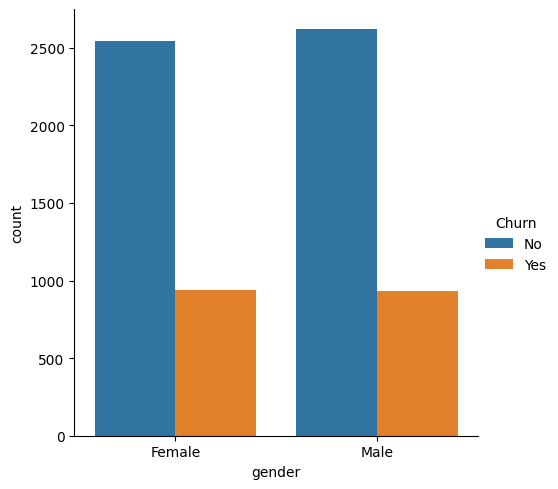

In [41]:
ax1 = sns.catplot(x="gender", kind="count", hue="Churn", data=telecom_cust,
                  estimator=lambda x: sum(x==0)*100.0/len(x))

#### Observation
- Wth SVM, the accuracy is increased to upto 82%.

### 4. ADA Boost

In [42]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

### 5. XG Boost

In [43]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8059701492537313

#### Observation
- Wth XG Boost, the accuracy is increased to upto 80%. 
-
XG Boost is a slow learning model and is based on the concept of Boosting.